In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from dataclasses import dataclass

In [152]:
class Model:

    def __init__(self, beta, sigma, L=32, seed=1873457190):
        self.beta = beta
        self.sigma = sigma
        self.L = L
        self.seed = seed
        self.random = np.random.RandomState(seed=seed)

        self.s = self.random.randint(-1, 2, (L, L))
        self.h = self.random.normal(size=(L, L), scale=sigma)
        self.t = 0
        self.energy = []
        self.mag = []

    @property
    def hamiltonian(self):
        s = self.s
        pairs = s * (np.roll(s, 1, 0) + np.roll(s, 1, 1))
        return - np.sum(pairs) - np.sum(s * self.h)

    @property
    def magnetization(self):
        return np.mean(self.s)


    def delta_ham(self, i, j, s_ij):
        s, h, L = self.s, self.h, self.L
        delta_sij = s_ij - s[i, j] 
        return - delta_sij * (s[(i+1) % L, j] + s[(i-1) % L, j] + s[i, (j+1) % L] + s[i, (j-1) % L] + h[i, j])


    def step(self):
        s, h, L, beta = self.s, self.h, self.L, self.beta

        dE = 0
        for i in range(L):
            for j in range(L):
                flip = 1 if self.random.rand() > 0.5 else -1
                sprime = ((s[i, j] + flip) + 1) % 3 - 1
                dHam = self.delta_ham(i, j, sprime)
                if dHam < 0 or self.random.rand() < np.exp(-beta * dHam):
                    s[i, j] = sprime
                    dE += dHam

        return dE

    def show(self):
        plt.matshow(self.s, cmap='RdBu')
        plt.axis('off')

    def run(self, steps=1000, verbose=50):
        energy = [self.hamiltonian]
        for step in range(steps):
            dE = self.step()
            energy.append(energy[-1] + dE)
            if verbose and not step % verbose:
                print(energy[-1])
        return energy
        
        

In [168]:
model = Model(1, sigma=0.0)
model.s = np.random.randint(-1, 2, model.s.shape)

In [169]:
energy = model.run(verbose=0)

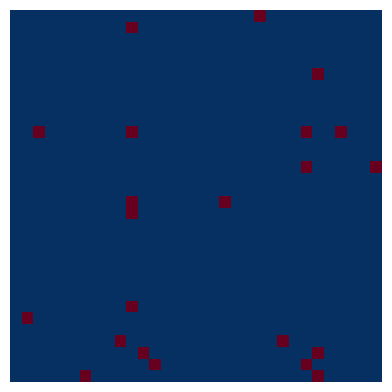

In [170]:
model.show()

In [97]:
for _ in range(10):
    s = np.random.randint(-1, 2, model.s.shape)
    model.s = s
    ham0 = model.hamiltonian
    i, j = np.random.randint(0, model.L, 2)

    print(model.delta_ham(i, j, ((s[i, j] + 1 + 1) % 3 - 1)))

    sprime = np.array(s)
    sprime[i, j] = ((s[i, j] + 1 + 1) % 3 - 1)
    model.s = sprime
    ham1 = model.hamiltonian
    
    print(ham1-ham0)
    print("\n")
    

0.12463359182614098
0.12463359182613942


0.5424912857746771
0.5424912857746769


1.351453485867699
1.3514534858676974


1.5780360270388747
1.578036027038877


-2.010720049365469
-2.0107200493654744


0.601884163670788
0.601884163670789


-0.31626389072182104
-0.31626389072182093


9.37140558172229
9.37140558172229


-4.238938765682832
-4.238938765682832


-5.35985934222465
-5.359859342224645




In [62]:
i, j = np.random.randint(0, model.L, 2)  

In [65]:

-1%2

1

In [70]:
ss = 1
np.sign(ss) * ((ss + 1) % 2)

0

In [73]:
-1 % -2

-1

In [80]:
ss = 2
((ss + 1) % 3 - 1)

-1

In [83]:
for ss in range(-2, 3):
    print(ss, ((ss + 1) % 3 - 1))

-2 1
-1 -1
0 0
1 1
2 -1
